In [1]:
from pathlib import Path
import os
compe='house-prices-advanced-regression-techniques'
iskaggle= os.environ.get('KAGGLE_KERNEL_RUNTYPE','')
if iskaggle:
    path=Path(f'../input/{compe}')
    ! pip install -Uqq fastai
else:
    import kaggle,zipfile
    path=Path(f'{compe}')
    if not path.exists():
        kaggle.api.competition_download_cli(str(path))
        zipfile.ZipFile(f'{path}.zip').extractall(path)

100%|████████████████████████████████████████| 199k/199k [00:00<00:00, 3.69MB/s]

In [3]:
!cd house-prices-advanced-regression-techniques; ls

data_description.txt  test.csv
sample_submission.csv train.csv


In [4]:
from fastai.tabular.all import *

pd.options.display.float_format = '{:.2f}'.format
set_seed(42)

In [5]:
df=pd.read_csv(f'{compe}/train.csv')
df_test=pd.read_csv(f'{compe}/test.csv')

In [32]:
from tabulate import tabulate
print('Shape of train :',df.shape)
print('Shape of test :',df_test.shape)
column_info = pd.DataFrame({
    'Type': df.dtypes,
    'NA percent': df.isna().sum()*100/df.shape[0]
})

table = tabulate(column_info, headers='keys', tablefmt='fancy_grid')
print(table)

Shape of train : (1460, 81)
Shape of test : (1459, 80)
╒═══════════════╤═════════╤══════════════╕
│               │ Type    │   NA percent │
╞═══════════════╪═════════╪══════════════╡
│ Id            │ int64   │    0         │
├───────────────┼─────────┼──────────────┤
│ MSSubClass    │ int64   │    0         │
├───────────────┼─────────┼──────────────┤
│ MSZoning      │ object  │    0         │
├───────────────┼─────────┼──────────────┤
│ LotFrontage   │ float64 │   17.7397    │
├───────────────┼─────────┼──────────────┤
│ LotArea       │ int64   │    0         │
├───────────────┼─────────┼──────────────┤
│ Street        │ object  │    0         │
├───────────────┼─────────┼──────────────┤
│ Alley         │ object  │   93.7671    │
├───────────────┼─────────┼──────────────┤
│ LotShape      │ object  │    0         │
├───────────────┼─────────┼──────────────┤
│ LandContour   │ object  │    0         │
├───────────────┼─────────┼──────────────┤
│ Utilities     │ object  │    0         │

In [34]:
df['SalePrice'].describe()

count     1460.00
mean    180921.20
std      79442.50
min      34900.00
25%     129975.00
50%     163000.00
75%     214000.00
max     755000.00
Name: SalePrice, dtype: float64

In [35]:
df_sub=pd.read_csv(f'{compe}/sample_submission.csv')
df_sub.head(3)

,Id,SalePrice
0,1461,169277.05
1,1462,187758.39
2,1463,183583.68


In [37]:
import subprocess
def make_sub(pred_y,sub_data=df_test,name='default'):
    df_submission = pd.DataFrame()
    df_submission['Id']=df_test['Id']
    df_submission['SalePrice']=pred_y
    df_submission.to_csv(f'submission-{name}.csv', index=False)
    cmd =f'kaggle competitions submit -c {compe} -f submission-{name}.csv -m "Message"'
    subprocess.run(cmd, shell=True)
    print(f'succesully saved - {name}')

In [38]:
dftt=pd.DataFrame()
dftt['Id']=df_test['Id']
dftt['Pred']=180921.20
make_sub(dftt['Pred'],name='mean_model')

100%|██████████| 20.0k/20.0k [00:01<00:00, 20.2kB/s]


Successfully submitted to House Prices - Advanced Regression Techniquessuccesully saved - mean_model


***
<b>Mean Model has a lose of Score: 0.42577</b>
***

In [39]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.00,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.00,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.00,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.00,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [42]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.00,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,730.50,56.90,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.20
std,421.61,42.30,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.50
min,1.00,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
25%,365.75,20.00,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.00
50%,730.50,50.00,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.00
75%,1095.25,70.00,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.00
max,1460.00,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,...,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.00


<AxesSubplot:xlabel='MasVnrArea', ylabel='Count'>

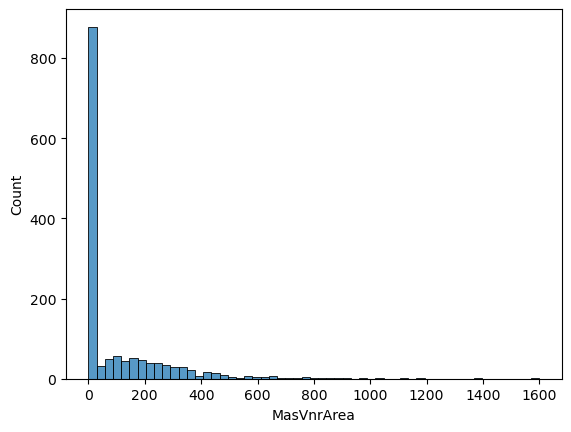

In [45]:
import seaborn as sns
sns.histplot(data=df,x='MasVnrArea')

In [65]:
count=df['MSSubClass'].value_counts()
print(count)

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64


In [134]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler,FunctionTransformer
from sklearn.ensemble import RandomForestRegressor
# from sklearn.linear_model import LinearRegression
def log_transform(X):
    return np.log1p(X)

numeric_preprocessor = Pipeline(
    steps=[
        ("imputation_mean", SimpleImputer(missing_values=np.nan, strategy="mean")),
        ("log_transform", FunctionTransformer(log_transform)),
#         ("scaler", StandardScaler()),
    ]
)

categorical_preprocessor = Pipeline(
    steps=[
        (
            "imputation_constant",
            SimpleImputer(fill_value="missing", strategy="most_frequent"),
        ),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

preprocessor = ColumnTransformer(
    [
        ("categorical", categorical_preprocessor, cat_cols),
        ("numerical", numeric_preprocessor,num_cols),
    ]
)

pipe = make_pipeline(preprocessor, RandomForestRegressor())
pipe  # click on the diagram below to see the details of each step

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'C...
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object'))])),
                ('randomforestregressor', RandomForestRegressor())])

In [113]:
cat_cols = X.select_dtypes(include=['object']).columns
num_cols=X.select_dtypes(include=['int64','float64']).columns
print(cat_cols)
print(num_cols)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'Kitch

In [67]:
Y=df['SalePrice']
X=df.drop(['Id','SalePrice'],axis=1,inplace=False)
X_test=df_test.drop(['Id'],axis=1,inplace=False)

In [126]:
def FE(M):
    cols=['YrSold','YearBuilt']
    M[cols]=np.log1p(M[cols])
    return M

In [135]:
pipe.fit(X,Y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'C...
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object'))])),
                ('randomforestregressor', RandomForestRegressor())])

In [136]:
preds=pipe.predict(X_test)

In [137]:
preds[:10]

array([128851.08, 154739.5 , 180502.4 , 180904.32, 199763.34, 183987.72,
       163662.97, 176481.34, 184655.26, 120392.53])

In [138]:
make_sub(preds,name='rf4lg')

100%|██████████| 20.9k/20.9k [00:00<00:00, 27.8kB/s]


400 - Bad Request
succesully saved - rf4lg


In [115]:
X1=FE(X.copy())

In [116]:
X_test1=FE(X_test.copy())

In [127]:
X1.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.00,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,56.90,70.05,10516.83,6.10,5.58,7.59,1984.87,103.69,443.64,46.55,...,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,7.61
std,42.30,24.28,9981.26,1.38,1.11,0.02,20.65,181.07,456.10,161.32,...,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,0.00
min,20.00,21.00,1300.00,1.00,1.00,7.54,1950.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,7.60
25%,20.00,59.00,7553.50,5.00,5.00,7.58,1967.00,0.00,0.00,0.00,...,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,7.60
50%,50.00,69.00,9478.50,6.00,5.00,7.59,1994.00,0.00,383.50,0.00,...,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,7.61
75%,70.00,80.00,11601.50,7.00,6.00,7.60,2004.00,166.00,712.25,0.00,...,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,7.61
max,190.00,313.00,215245.00,10.00,9.00,7.61,2010.00,1600.00,5644.00,1474.00,...,1418.00,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,7.61
